In [ ]:

from google.colab import drive

drive.mount('/content/drive/')

import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Conv2D, Activation, GlobalAvgPool2D, MaxPooling2D, Dense, Flatten, Dropout

from keras.models import Sequential

file1='/content/drive/MyDrive/archive (1)/Train'

file2= '/content/drive/MyDrive/archive (1)/Test'

from keras.preprocessing.image import ImageDataGenerator

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(
                                   horizontal_flip = True)

In [ ]:
train_set = train_datagen.flow_from_directory(file1,
                                                 target_size = (384, 384),
                                                 class_mode='categorical',
                                                 batch_size = 6)


Found 64 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(horizontal_flip = True)

test_set = test_datagen.flow_from_directory(file2,
                                            target_size = (384, 384),
                                            class_mode='categorical',
                                            batch_size =3)

Found 58 images belonging to 3 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Dense(3, activation='relu', input_shape=[384,384,3]))
cnn.add(tf.keras.layers.Conv2D(128, kernel_size=[3,3], padding='valid', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(64, kernel_size=[2,2],padding='valid', activation='relu' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(32, kernel_size=[2,2],padding='valid', activation='relu' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(16, kernel_size=[2,2],padding='valid', activation='relu' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(8, kernel_size=[2,2],padding='valid', activation='relu' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(4, kernel_size=[2,2],padding='valid', activation='relu' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2], strides=2, padding='valid'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(3, activation='softmax'))
cnn.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384, 384, 3)       12        
                                                                 
 conv2d (Conv2D)             (None, 382, 382, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 190, 190, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 189, 64)      32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 94, 94, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 93, 93, 32)        8

In [ ]:
history = cnn.fit(train_set, validation_data =test_set, epochs=5, verbose=2)

Epoch 1/5
11/11 - 8s - loss: 0.3241 - categorical_accuracy: 0.8438 - val_loss: 1.4380 - val_categorical_accuracy: 0.6379 - 8s/epoch - 685ms/step
Epoch 2/5
11/11 - 7s - loss: 0.1869 - categorical_accuracy: 0.9531 - val_loss: 1.4695 - val_categorical_accuracy: 0.5517 - 7s/epoch - 677ms/step
Epoch 3/5
11/11 - 7s - loss: 0.2757 - categorical_accuracy: 0.8906 - val_loss: 1.1937 - val_categorical_accuracy: 0.6724 - 7s/epoch - 678ms/step
Epoch 4/5
11/11 - 8s - loss: 0.2841 - categorical_accuracy: 0.9219 - val_loss: 1.7580 - val_categorical_accuracy: 0.6034 - 8s/epoch - 688ms/step
Epoch 5/5
11/11 - 8s - loss: 0.1666 - categorical_accuracy: 0.9844 - val_loss: 1.4524 - val_categorical_accuracy: 0.6552 - 8s/epoch - 687ms/step


[[0.9016767  0.08088464 0.01743862]]


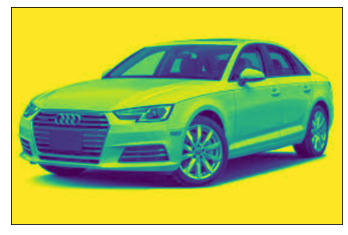

In [ ]:
import cv2

import matplotlib.pyplot as plt

import numpy as np
import cv2

def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/content/audi.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y=cnn.predict([prepare('/content/audi.jpg')])

print(y)

img = cv2.imread('/content/audi.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

In [ ]:
np.argmax(y)

0

[[0.00205513 0.98969054 0.00825442]]


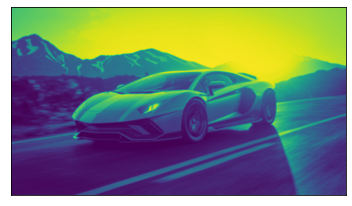

In [ ]:
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/lamborg.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

x=cnn.predict([prepare('/lamborg.jpg')])

print(x)

img = cv2.imread('/lamborg.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

In [ ]:
np.argmax(x)

1

[[0.03100607 0.03305162 0.93594235]]


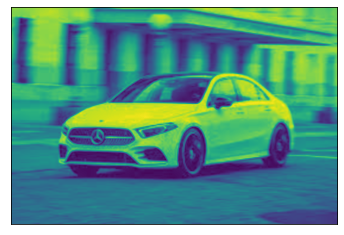

In [ ]:
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/content/mercedez.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

z=cnn.predict([prepare('/content/mercedez.jpg')])

print(z)

img = cv2.imread('/content/mercedez.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

In [ ]:
np.argmax(z)

2